In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[1]

0

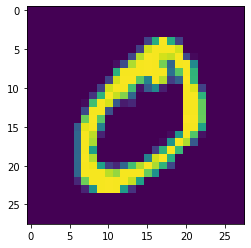

In [ ]:
plt.imshow(X_train[4])

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [13]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [16]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.2134 - accuracy: 0.9531 - val_loss: 0.0885 - val_accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 183s 97ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 0.0794 - val_accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0830 - val_accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.1122 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 181s 97ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0927 - val_accuracy: 0.9790


In [17]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09267692267894745, 0.9789999723434448]


In [22]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 19ms/step
[[1.9365246e-10 1.3333769e-17 3.5999128e-09 7.2965641e-08 1.9771158e-14
  5.8884841e-15 3.0843962e-19 9.9999988e-01 1.7022290e-11 4.0815240e-09]
 [2.5427802e-15 2.8247871e-15 1.0000000e+00 1.4904633e-13 8.1432912e-23
  6.2573406e-23 1.3212432e-13 9.1456905e-24 5.3921292e-15 8.2748157e-22]
 [9.8473181e-11 1.0000000e+00 1.6202584e-08 2.8648010e-13 8.9230928e-11
  4.5283173e-09 5.7652300e-10 1.8862800e-09 4.3188472e-10 1.8692051e-11]
 [1.0000000e+00 9.8771263e-16 1.4216699e-10 1.2504578e-17 2.2950118e-15
  2.1370048e-11 5.8684555e-09 6.4102772e-15 9.6182047e-13 2.6029866e-11]]


In [23]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
